# LightGBM
**장점**
* XGboost보다 더 빠른 학습시간과 더 작은 메모리 사용
* 카테고리형 피처의 자동ㅂㄴ환과 최적분할(원-핫 인코딩을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)

**단점**

* 적은 데이터셋에 적용할 경우 과적합이 발생하기 쉽다는 단점이있음(10000건 이하의 데이터세트)

**구현사상**

* LightGBM의 구현사상은 리프노드를 지속적으로 분할해 예측오류 손실을 줄일수 있다는 것.(중심트리 분할 사상_Leaf Wise)
* 최대손실값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙트리가 생성됩니다.
* 하지만 이렇게 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM의 구현사상.

**설치방법**

`!pip install lightgbm` : 쥬피터 노트북상에서 설치

`아나콘다 프롬프트 (관리자모드) : conda install -c conda-forge lightgbm`

**균형트리분할 v.s 리프중심 트리 분할**
* [이미지 출처](https://jaaamj.tistory.com/40)

In [5]:
from IPython.display import Image
import os

**일반 GBM계열의 트리분할방법**

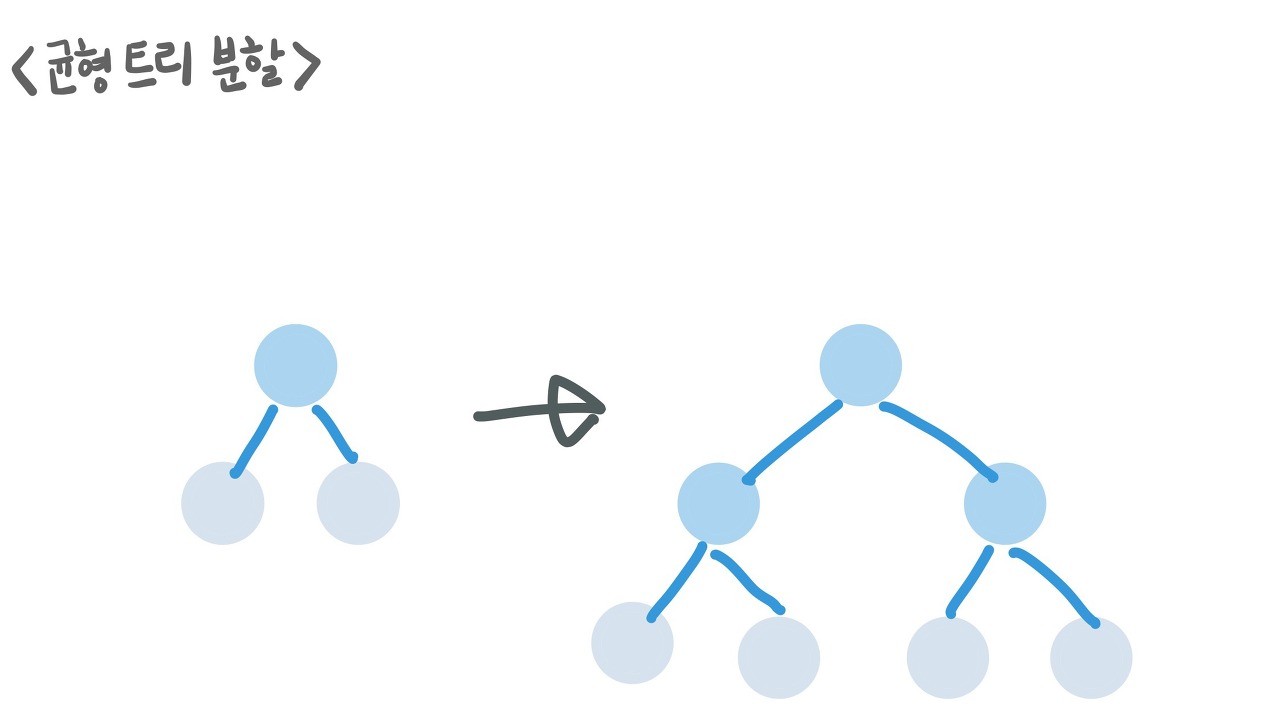

In [10]:
Image("C:/dataAnalysis/philosophy_datascience/img/균형트리분할.png", width = 300, height= 300)

**리프중심트리분할**

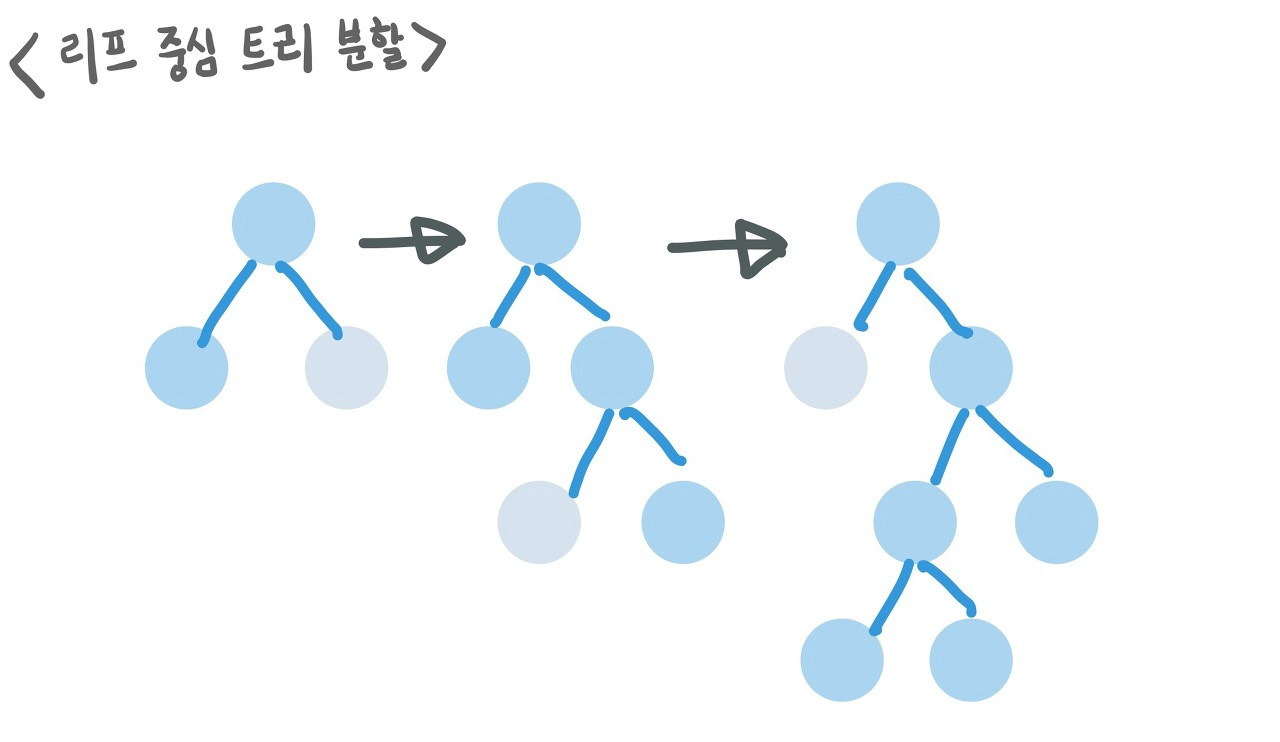

In [11]:
Image("C:/dataAnalysis/philosophy_datascience/img/리프중심분할.png", width = 300, height= 300)

**Light GBM 하이퍼 파라미터**

|**파라미터명**|**기본값**|**파라미터에 대한 설명**|
|:---------------|:----------|:-----------------------------------|
|num_iteration| 100 |반복수행하려는 트리의 갯수 지정. 크게 지정할수록 예측성능이 높아질수있으나, 너무 크게 지정하면 과적합으로 성능저하 가능성이 있다. 사이킷런 GBM과 XGBoost의 사이킷런 호환 클래스의 n_estimator와 같은 파라미터|
|learning_rate| 0.1 |0과 1사이의 값을 지정하며 부스팅 스텝을 반복 수행시 업데이트 되는 학습값.일반적으로 n_estimator를 크게하고 learning_rate를 작게해서 예측성능을 향상 시킬수있으나, 마찬가지로 과적합 이슈와 학습시간이 길어지는 부정적인 영향도 고려해야 합니다.|
|max_depth| -1 |트리기반 알고리즘의 max_depth와 같습니다. 0보다  작은 값을 지정하면 깊이에 제한이 없습니다.(Leaf wise방식)|
|min_data_in_leaf| 20 |결정트리의 min_sample_leaf와 같은 파라미터.하지만 사이킷런 래퍼 LightGBM클래스인 LightGBM에서는 min_child_samples 파라미터로 이름이 변경.최종 결정클래스인 리프노드가 되기 위해서 최소한으로 필요한 레코드수이며 ,과적합을 제어하기 위한 파라미터|
| num_leaves | 31 |하나의 트리가 가질수있는 최대 리프 갯수 |
| boosting 	| gbdt|부스팅의 트리를 생성하는 알고리즘 <br> * gbdt: 일반적인 그래디언트 부스팅 결정 트리 <br>* rt: 랜덤포레스트|
| bagging_fratction	| 1.0 	|트리가 커져서 과적합 되는 것을 제어하기 위해서 데이터를 샘플링하는 비율 지정. 사이킷런의 GBM과 XGBClassifier의 subsample과 동일하기에 사이킷런 래퍼 LightGBM Classifier에서는 subsample로 동일하게 파라미터 이름이 변경됩니다. 	|
|feature_fraction  	|1.0  	| 개별트리를 학습할 때마다 무작위로 선택하는 피처의 비율.과적합을 막기위해 사용됩니다.GBM의 max_features와 유사하며, XGBClassifier의 colsample_bytree로 변경됩니다.|
|lambda_l2	| 0.0  	| L2 Regulation제어를 위한 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있습니다. XGBCassifier의 reg_lambda와 동일하므로 LightGBMClassifier에서는 reg_lambda로 변경됩니다.  	|
| lambda_l1 	| 0.0 	| L1 Regulation제어를 위한 값.L2와 마찬가지로 과적합 제어를 위한 것이며, XGBClassifier의 reg_alpha와 동일하므로 LightGBMClassifier에서는 reg_alpha로 변경됩니다.|

**Learning Tast 파라미터**

|**파라미터명**|**파라미터에 대한 설명**|
|:---------------|:-----------------------------------|
|objective| 최소값을 가져여 할 손실함수를 정의.XGBoost의 objective파라미터와 동일합니다. 애플리케이션 유형, 즉 회귀, 다중 클래스 분류,이진분류인지에 따라서 objective인 손실함수가 정의됨|

**하이퍼 파라미터 튜닝방안**

* `num_leaves`개별 트리가 가질 수 있는 최대 리프의 갯수이고 LightGBM모델의 복잡도를 제어하는 파라미터.
이 갯수가 증가하면 정확도는 증가하지만,트리의 깊이가 깊어지고 과적합 영향도가 커진다.
* `min_data_in_leaf` 는 사이킷런 레퍼 클래스에서는 `min_child_samples`로 이름이 바뀝니다.과적합을 개선하기 위한 중요 파라미터.`num_leaves`와 학습 데이터의 크기에 따라 달라지지만,보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지.
* `max_depth`는 명시적으로 깊이의 크기를 제한.`num_leaves`와 `min_data_in_leaf`와 결합해 과적합을 개선하는데 사용.
* `learning_rate`를 작게 하면서 `n_estimators`를 크게 하는 것은 부스팅 계열에서 가장 기본적인 튜닝방안
* `n_estimators`을 너무 크게하는 것은 과적합으로 오히려 성능이 저하될수 있음을 주의.
* 이외의 과적합 제어를 위한 파라미터로 `reg_lambda`와 `reg_alpha`와 같은 regulation을 적용하거나 학습데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 `colsample_bytree`, `subsamples`파라미터를 적용 할 수 있습니다.

In [3]:
os.getcwd()

'C:\\dataAnalysis\\philosophy_datascience\\01.ML\\03.Scikit-Learn'

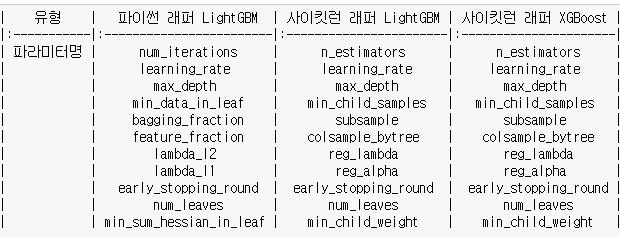

In [4]:
Image("C:/dataAnalysis/philosophy_datascience/img/하이퍼_파라미터비교.PNG")

## LightGBM적용 - 위스콘신 유방암 예측

In [25]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트 
from lightgbm import LGBMClassifier

# 피처 중요도 시각화
from lightgbm import plot_importance

import pandas as pd
import numpy as np
import evaluation
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
%matplotlib inline

warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
dataset = load_breast_cancer()

ftr = dataset.data
target = dataset.target

ftr.shape, target.shape

# 전체 데이터 중 80퍼센트는 학습용, 20퍼센트는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size = 0.2, random_state = 156)

# 앞서 XGBoost와 동일하게 n_estimators값은 동일하게 400으로 설정
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.

evals = (X_test, y_test)
lgbm_wrapper.fit(X_train,y_train,eval_set=evals,eval_metric='logloss',early_stopping_rounds=100,verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]  # 양성 확률

In [19]:
evaluation.get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9500,                 F1 스코어 : 0.9682, FOC AUC값 : 0.9905


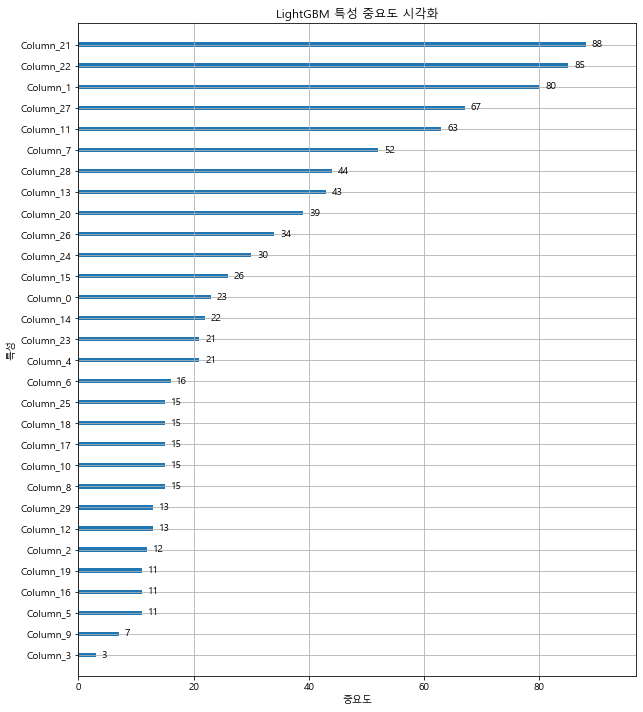

In [26]:
fig,ax = plt.subplots(figsize = (10, 12))

plot_importance(lgbm_wrapper, ax=ax, title='LightGBM 특성 중요도 시각화', xlabel='중요도', ylabel='특성', grid=True)
plt.show()